In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%config IPCompleter.greedy=True

In [2]:
tweets = pd.read_csv('train.csv')

In [3]:
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
tweets.count()

id          7613
keyword     7552
location    5080
text        7613
target      7613
dtype: int64

In [5]:
tweets.dtypes.value_counts()

object    3
int64     2
dtype: int64

In [6]:
tweets_keyword = tweets['keyword']

In [7]:
tweets_keyword.value_counts().head(5)

fatalities     45
deluge         42
armageddon     42
sinking        41
body%20bags    41
Name: keyword, dtype: int64

In [8]:
tweets_keyword.value_counts(normalize=True).head(5)

fatalities     0.005959
deluge         0.005561
armageddon     0.005561
sinking        0.005429
body%20bags    0.005429
Name: keyword, dtype: float64

In [9]:
tweets_keyword.count()

7552

In [10]:
tweets_keyword.size

7613

In [11]:
tweets['keyword'].isnull().mean()

0.008012610009194798

In [12]:
tweets['text_len']=tweets['text'].str.len()

In [13]:
tweets.head(5)

,id,keyword,location,text,target,text_len
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [14]:
tweets.corr()

,id,target,text_len
id,1.000000,0.060781,0.017393
target,0.060781,1.000000,0.181817
text_len,0.017393,0.181817,1.000000


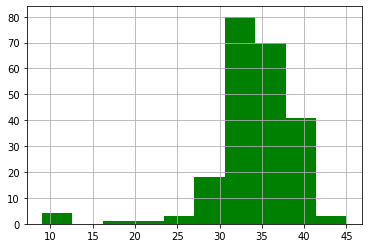

In [15]:
tweets.keyword.value_counts().hist(color='green', bins=10)

## Vemos la relacion entre la aparicion de una palabra clave y la veracidad del tweet

In [16]:
tweets.keyword.value_counts().head(5)

fatalities     45
deluge         42
armageddon     42
sinking        41
body%20bags    41
Name: keyword, dtype: int64

In [17]:
#porcentaje de keywords que terminan en target 1
keyword_grouped_target = tweets.loc[:,['keyword','target']].groupby('keyword').agg({'target': 'mean'})
keyword_grouped_target.head(5)

,target
keyword,
ablaze,0.361111
accident,0.685714
aftershock,0.000000
airplane%20accident,0.857143
ambulance,0.526316


### Hacemos un top 10 de las keyword que pertenecen a tweets de catastrofes

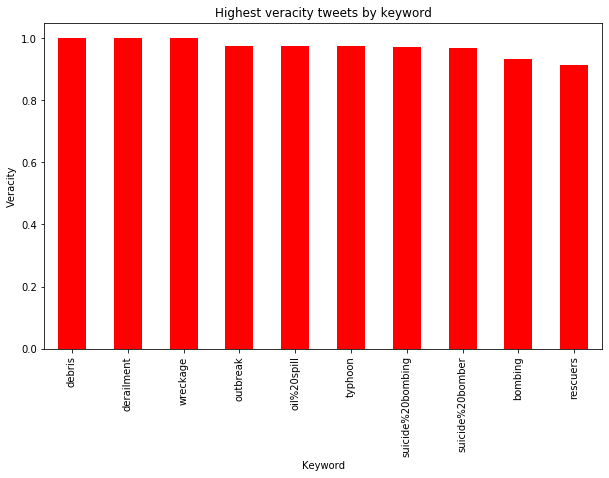

In [18]:
#top 10 keyword con mayor veracidad
keyword_grouped_target['target'].nlargest(10).plot(kind='bar',title='Highest veracity tweets by keyword',linewidth=2,figsize=(10,6), color='red');
ax=plt.gca()
ax.set_ylabel('Veracity');
ax.set_xlabel('Keyword')
plt.savefig('barHighestVeracityKeyword.png')

### Hacemos un top 10 de las keyword que no pertenecen a tweets de catastrofes

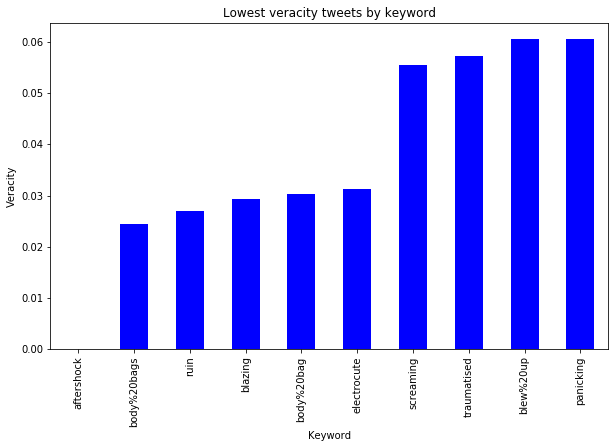

In [19]:
#top 10 keyword con menor veracidad
keyword_grouped_target['target'].nsmallest(10).plot(kind='bar',title='Lowest veracity tweets by keyword',linewidth=2,figsize=(10,6), color='blue');
ax=plt.gca()
ax.set_ylabel('Veracity');
ax.set_xlabel('Keyword')
plt.savefig('barLowestVeracityKeyword.png')

### Vemos que keywords tiene un porcentaje de veracidad mayor al 75%

In [20]:
#Tomo solo los keywords que tienen un promedio de veracidad mayor al 75%
Higher_avg_keyword_grouped = keyword_grouped_target[keyword_grouped_target.target > 0.75]
Higher_avg_keyword_grouped = Higher_avg_keyword_grouped.sort_values('target', ascending=False)
Higher_avg_keyword_grouped.count()

target    29
dtype: int64

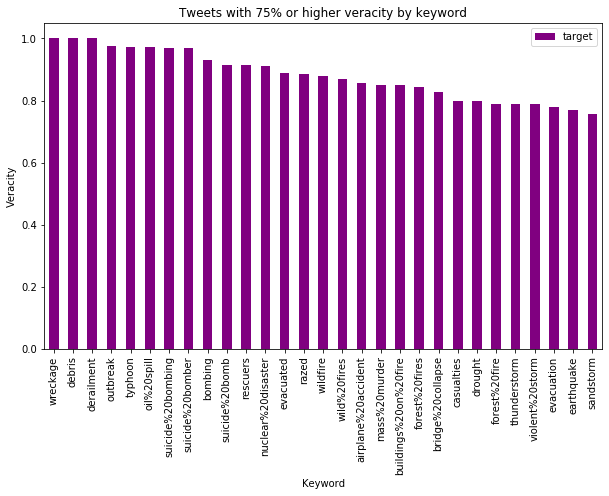

In [21]:
Higher_avg_keyword_grouped.plot(kind='bar',title='Tweets with 75% or higher veracity by keyword',linewidth=2,figsize=(10,6), color='purple');
ax=plt.gca()
ax.set_ylabel('Veracity');
ax.set_xlabel('Keyword')
plt.savefig('barSortedHigher75VeracityKeyword.png')

### Vemos que keywords tiene un porcentaje de veracidad menor al 25%

In [22]:
#Tomo solo los keywords que tienen un promedio de veracidad menor al 25%
Lower_avg_keyword_grouped = keyword_grouped_target[keyword_grouped_target.target < 0.25]
Lower_avg_keyword_grouped = Lower_avg_keyword_grouped.sort_values('target', ascending=False)
Lower_avg_keyword_grouped.count()

target    76
dtype: int64

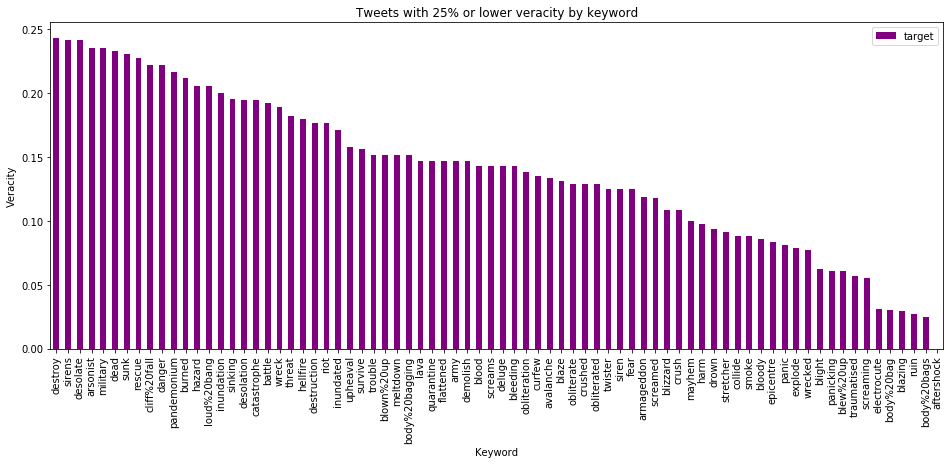

In [23]:

Lower_avg_keyword_grouped.plot(kind='bar',title='Tweets with 25% or lower veracity by keyword',linewidth=2,figsize=(16,6), color='purple');
ax=plt.gca()
ax.set_ylabel('Veracity');
ax.set_xlabel('Keyword')
plt.savefig('barSortedLower25VeracityKeyword.png')

## Relacion entre la cantidad de veces que aparece un keyword y su veracidad

In [24]:
keyword_grouped = tweets.loc[:,['keyword','target']].groupby('keyword').agg({'target': ['mean','sum','count']})
level1 = keyword_grouped.columns.get_level_values(1)
level0 = keyword_grouped.columns.get_level_values(0)
keyword_grouped.columns = level0 + '_' + level1
keyword_grouped.head(5)

,target_mean,target_sum,target_count
keyword,,,
ablaze,0.361111,13,36
accident,0.685714,24,35
aftershock,0.000000,0,34
airplane%20accident,0.857143,30,35
ambulance,0.526316,20,38


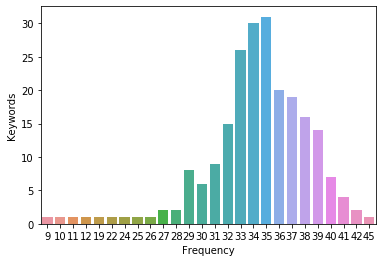

In [25]:
ax = sns.countplot(x='target_count', data = keyword_grouped)
ax.set(xlabel='Frequency', ylabel='Keywords')
plt.savefig('countPlotKeyword.png')

#### En la figura vemos cuantas keyword tienen la misma cantidad de apariciones en el set de datos. Las keywords suelen aparecer entre 32 y 39 veces en el set de datos teniendo un tope de mas de 30 keywords que aparecen 35 veces en el set.

### Scatter Plot

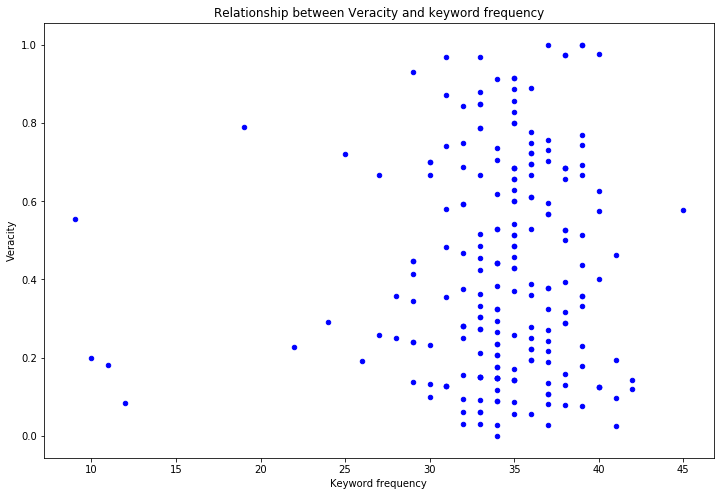

In [26]:
#Veracidad segun la cantidad de apariciones de un keyword, scatterplot
keyword_grouped.plot.scatter('target_count','target_mean', title='Relationship between Veracity and keyword frequency',figsize=(12,8), color='blue');
ax=plt.gca()
ax.set_ylabel('Veracity')
ax.set_xlabel('Keyword frequency');
plt.savefig('scatterVeracityByKeyword.png')

#### De la figura podemos señalar que la mayoria de los keyword aparecen entre 30 y 40 veces en el set, pero su veracidad es variada dado que se encuentran distintos porcentajes de veracidad a lo largo de toda esta banda.

### Box Plot

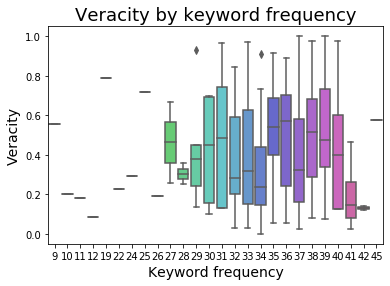

In [27]:
#veracidad segun la cantidad de apariciones del keyword, boxplot
g = sns.boxplot(x="target_count", y="target_mean", 
                     data=keyword_grouped, palette="hls")
g.set_title("Veracity by keyword frequency", fontsize=18)
g.set_xlabel("Keyword frequency", fontsize=14)
g.set_ylabel("Veracity", fontsize=14)
plt.savefig('boxVeracityByKeyword.png')

#### Lo mismo se puede apreciar en esta figura en donde la media de la veracidad varia segun la frecuencia de aparición de una keyword en el set de datos.

## Relacion entre keywords de tweets que siempre son verdad o no

#### Vamos a analizar aquellos keyword que siempre aparecen en tweets verdaderos y aquellos cuyos tweet nunca resultaron ser sobre cataastrofes al aparecer en ellos.

In [28]:
true_or_false_keyword = keyword_grouped[(keyword_grouped['target_mean'] == 0) | (keyword_grouped['target_mean'] == 1 )]
true_or_false_keyword

,target_mean,target_sum,target_count
keyword,,,
aftershock,0.0,0,34
debris,1.0,37,37
derailment,1.0,39,39
wreckage,1.0,39,39


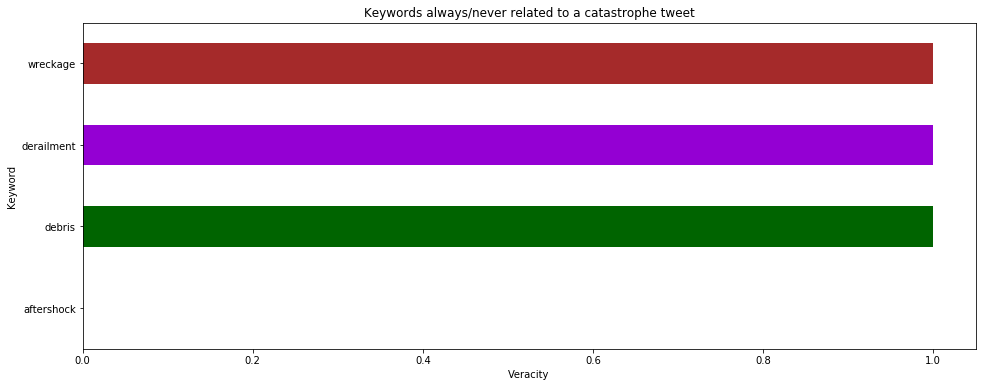

In [29]:
#Keywords que siempre son verdad o no
true_or_false_keyword.target_mean.plot(kind='barh',title='Keywords always/never related to a catastrophe tweet',linewidth=2,figsize=(16,6), color=['brown','darkgreen','darkviolet']);
ax=plt.gca()
ax.set_ylabel('Keyword');
ax.set_xlabel('Veracity')
plt.savefig('hBarKeywordAlwaysNever.png')

#### De la figura obtenemos que solo las keyword: wreckage, derailment y debris siempre corresponden a tweets sobre catastrofes y en el otro caso tenemos aftershock que nunca se ha correspondido con un tweet sobre catastrofes.

## Relacion entre tweets que tienen keyword y los que no tienen

#### ¿Y que sucede con aquellos tweets que no tienen ninguna keyword?

In [30]:
# Creamos una columna para poder filtrar los que no tienen keyword
tweets['has_keyword']=tweets['keyword'] == tweets['keyword']
tweets.loc[tweets["has_keyword"] == True,"has_keyword"] = 1
tweets.loc[tweets["has_keyword"] == False ,"has_keyword"] = 0
tweets.head(5)

,id,keyword,location,text,target,text_len,has_keyword
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,0


In [31]:
# Agrupamos en aquellos que tienen y los que no tienen una keyword
hasKeyword_grouped = tweets.groupby('has_keyword').agg({'target':['sum','count','mean','std']})
level1 = hasKeyword_grouped.columns.get_level_values(1)
level0 = hasKeyword_grouped.columns.get_level_values(0)
hasKeyword_grouped.columns = level0 + '_' + level1
hasKeyword_grouped.rename(columns = {'target_sum':'target','target_count' : 'tweets'}, inplace = True)
hasKeyword_grouped

,target,tweets,target_mean,target_std
has_keyword,,,,
0,42,61,0.688525,0.466940
1,3229,7552,0.427569,0.494759


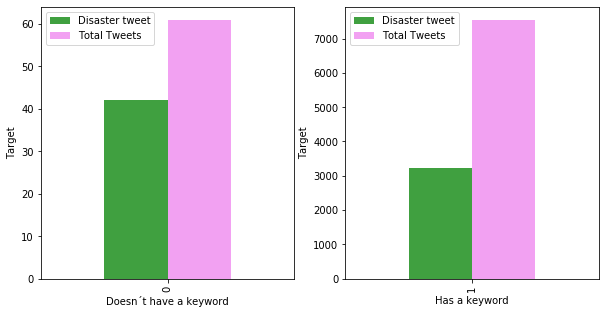

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
hasKeyword_grouped.loc[[0],['target','tweets']].plot(kind="bar", stacked=False,color=("green","violet"),alpha=0.75, ax=axes[0])
hasKeyword_grouped.loc[[1],['target','tweets']].plot(kind="bar", stacked=False,color=("green","violet"),alpha=0.75, ax=axes[1])
axes[0].set(xlabel='Doesn´t have a keyword', ylabel='Target')
axes[1].set(xlabel='Has a keyword', ylabel='Target')
for ax in axes.flat:
    ax.legend(("Disaster tweet","Total Tweets"))
plt.savefig('twoBarKeywordVSNoKeyword.png')

#### Antes del análisis se debe señalar que la cantidad de muestras para los que no tienen keywords es muy poca, 100 contra  7500. Pero en un principio se puede notar que en promedio aquellos tweets que no tienen ninguna keyword tienen mas probabilidad de ser verdaderos que aquellos que no tienen, esto debe ser porque muchas keyword son utilizadas en otro sentido mas alla del de una catastrofe.

## Hay tweets cuya keyword no aparece en el texto

### Esta vez solo tomamos a aquellas keyword que realmente estan dentro del tweet

In [33]:
#Nos aseguramos que la keyword forme parte del texto, caso contraro eliminamos la fila
tweets_dropped = tweets[tweets.keyword.isnull() == 0]
tweets['keyword_in_tweet'] = tweets_dropped.apply(lambda x: x['keyword'] in x['text'], axis=1)
tweets_keyword_dropped = tweets[tweets['keyword_in_tweet'] == True]
tweets_keyword_dropped.head(5)

,id,keyword,location,text,target,text_len,has_keyword,keyword_in_tweet
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze http://t.co/l...,1,55,1,True
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,1,True
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0,34,1,True
36,54,ablaze,Pretoria,@PhDSquares #mufc they've built so much hype a...,0,122,1,True
38,56,ablaze,NaN,Barbados #Bridgetown JAMAICA ÛÒ Two cars set ...,1,140,1,True


In [34]:
# Agrupamos nuevamente para ver como quedan las nuevas keyword filtradas
dropped_keyword_grouped = tweets_keyword_dropped.groupby('keyword').agg({'target' : ['sum','count']})
level1 = dropped_keyword_grouped.columns.get_level_values(1)
level0 = dropped_keyword_grouped.columns.get_level_values(0)
dropped_keyword_grouped.columns = level0 + '_' + level1
dropped_keyword_grouped.head(5)

,target_sum,target_count
keyword,,
ablaze,10,21
accident,10,21
aftershock,0,4
ambulance,19,31
annihilated,6,25


### ¿Cuales son las keywords mas utilizadas y que tanto se relacionan con tweets de catasfrofes?

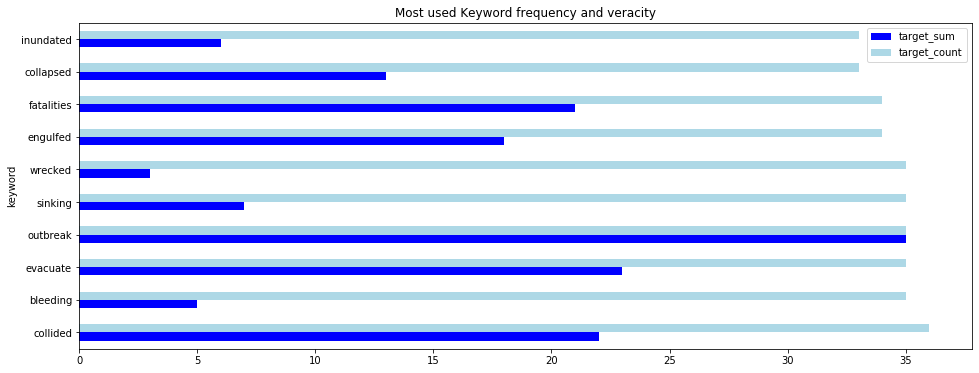

In [35]:
#Tomo las 10 keywords por la cantidad de apariciones y hago un barplot
dropped_keyword_grouped.nlargest(10,'target_count').plot(kind='barh',title='Most used Keyword frequency and veracity',linewidth=2,figsize=(16,6), color=['blue','lightblue']);
ax.set_ylabel('Keyword')
plt.savefig('hBarMostUsedKeywordFrequencyAndVeracity.png')

#### La palabra clave que resalta en este grafico es 'outbreak' que en cada caso que aparece en un tweet este se relaciona con una catastrofe teniendo un porcentaje de relacion de un 100% mucho mayor al resto de las palabras claves mas utilizadas.

### Ahora vemos las keywords menos utilizadas

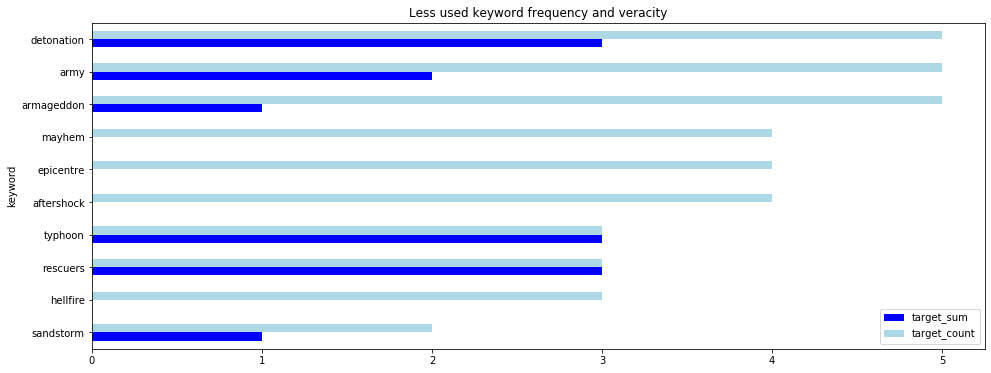

In [36]:
#Tomo las 10 menores
dropped_keyword_grouped.nsmallest(10,'target_count').plot(kind='barh',title='Less used keyword frequency and veracity',linewidth=2,figsize=(16,6), color=['blue','lightblue']);
ax.set_ylabel('Keyword')
ax.set_xlabel('Veracity')
plt.savefig('hBarLessUsedKeywordFrequencyAndVeracity.png')

#### En este grafico nos encontramos con 3 palabras claves ('mayhem', 'epicentre', 'aftershock') que nunca resultan ser sobre catastrofes aunque tambien se han utilizado solo 4 veces en todo el set de datos.

#### Conclusion 
A partir de estas dos figuras concluimos que aquellas keyword mas utilizadas tienen por lo menos una cantidad minima de tweets relacionados con catastrofes mientras que las keyword menos usadas (5 o menos) tienden a ser mas desiguales, teniendo casos donde ninguno o todos se usan en tweets de desastres. 

### Tomamos los keywords cuyo promedio de veracidad es mayor al promedio de todas las keyword

In [37]:
#hago un nuevo groupby pero esta vez incluyo el promedio
dropped_keyword_grouped_mean = tweets_keyword_dropped.groupby('keyword').agg({'target' : ['sum','count','mean']})
level1 = dropped_keyword_grouped_mean.columns.get_level_values(1)
level0 = dropped_keyword_grouped_mean.columns.get_level_values(0)
dropped_keyword_grouped_mean.columns = level0 + '_' + level1
dropped_keyword_grouped_mean.head(5)

,target_sum,target_count,target_mean
keyword,,,
ablaze,10,21,0.476190
accident,10,21,0.476190
aftershock,0,4,0.000000
ambulance,19,31,0.612903
annihilated,6,25,0.240000


In [38]:
#obtenemos el promedio general
dropped_keyword_grouped_mean.target_mean.mean()

0.4118761397975771

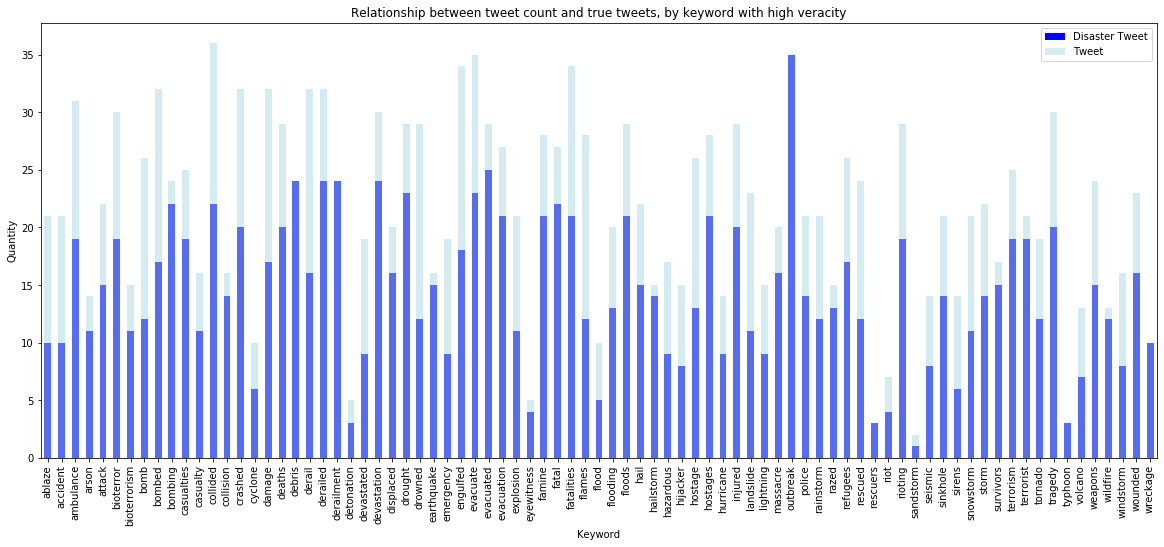

In [39]:
dropped_keyword_grouped_higher_than_mean = dropped_keyword_grouped_mean[dropped_keyword_grouped_mean.target_mean > dropped_keyword_grouped_mean.target_mean.mean()]

#plot
ax = dropped_keyword_grouped_higher_than_mean.target_sum.plot(kind='bar',label ='Disaster Tweet',linewidth=4,figsize=(20,8), color='blue', legend=True);
ax = dropped_keyword_grouped_higher_than_mean.target_count.plot(kind='bar',label ='Tweet',linewidth=4,figsize=(20,8), color='lightblue', legend=True, alpha=0.5);
ax.set_title("Relationship between tweet count and true tweets, by keyword with high veracity")
ax.set_xlabel("Keyword")
ax.set_ylabel("Quantity")
plt.savefig('barDroppedKeywordVeracityHigh.png')

#### De la figura obtenemos la cantidad de tweets por keyword (celeste) y en azul que tantos de esos tweets son sobre catastrofes. Aquellas barras que aparecen completamente azules indican que esa keyword siempre termino en un tweets que se trataba de un desastre. Por ejemplo en el caso de "outbreak" y "wreckage".

### Ahora tomamos los que son menores al promedio

In [40]:
dropped_keyword_grouped_lower_than_mean = dropped_keyword_grouped_mean[dropped_keyword_grouped_mean.target_mean < dropped_keyword_grouped_mean.target_mean.mean()]
dropped_keyword_grouped_lower_than_mean.head(5)

,target_sum,target_count,target_mean
keyword,,,
aftershock,0,4,0.000000
annihilated,6,25,0.240000
annihilation,3,8,0.375000
apocalypse,4,15,0.266667
armageddon,1,5,0.200000


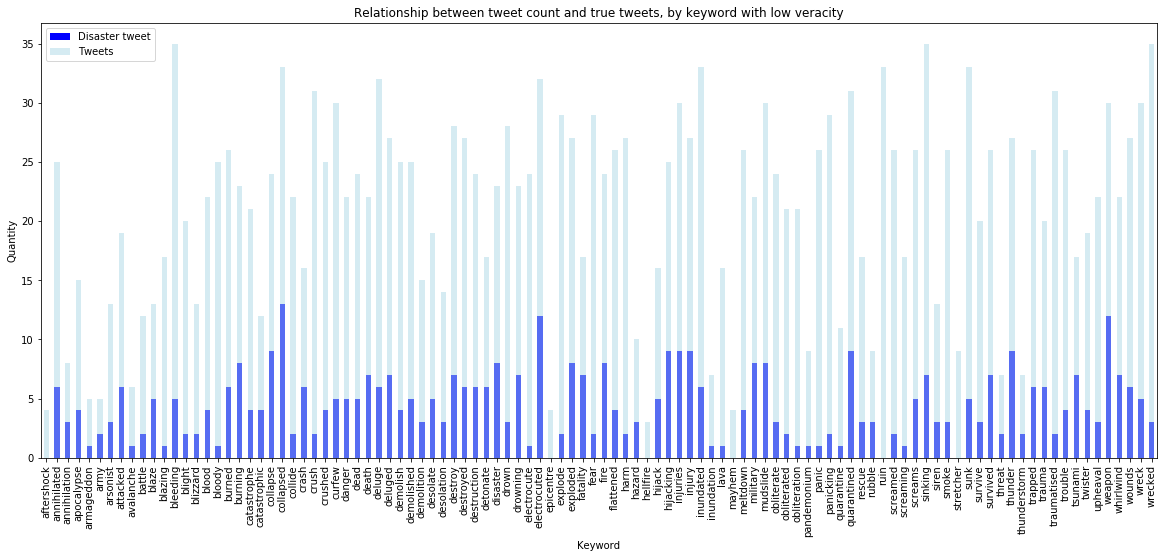

In [41]:
#Repetimos el mismo tipo de grafico que el anterior
ax = dropped_keyword_grouped_lower_than_mean.target_sum.plot(kind='bar',label ='Disaster tweet',linewidth=4,figsize=(20,8), color='blue', legend=True);
ax = dropped_keyword_grouped_lower_than_mean.target_count.plot(kind='bar',label ='Tweets',linewidth=4,figsize=(20,8), color='lightblue', legend=True, alpha=0.5);
ax.set_title("Relationship between tweet count and true tweets, by keyword with low veracity")
ax.set_xlabel("Keyword")
ax.set_ylabel("Quantity")
plt.savefig('barDroppedKeywordVeracityLow.png')

#### A primera vista podemos ver que es mucho mayor la cantidad de keywords que possen una veracidad muy baja con respecto a la cantidad de veces que aparecen.

#### Conclusion de este tema
Podemos concluir que la mayoria de las veces que se utiliza una keyword es en un contexto distinto al de una catastrofe y logramos encontrar pocas palabras que son casi exclusivamente utilizadas para catastrofes.

## ¿Que relacion hay entre los keywords y la localidad?

In [42]:
tweets.head(5)

,id,keyword,location,text,target,text_len,has_keyword,keyword_in_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,0,NaN
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,0,NaN
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,0,NaN
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,0,NaN
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,0,NaN


In [43]:
#quito todos los tweets que no tengan localidad o keyword
tweets_location_dropped = tweets.dropna()

#Me aseguro que el keyword aparezca en el texto
tweets_location_dropped = tweets_location_dropped[tweets_location_dropped['keyword_in_tweet'] == True]

#Me aseguro que la localidad aparezca en el texto
tweets_location_dropped['location_in_tweet'] = tweets_location_dropped.apply(lambda x: x['location'] in x['text'], axis=1)
tweets_location_dropped = tweets_location_dropped[tweets_location_dropped['location_in_tweet'] == True]

#Solamente tengo las filas que tiene una keyword y localidad en el tweet
tweets_location_dropped.head(5)

,id,keyword,location,text,target,text_len,has_keyword,keyword_in_tweet,location_in_tweet
33,50,ablaze,AFRICA,#AFRICANBAZE: Breaking news:Nigeria flag set a...,1,82,1,True,True
565,817,battle,Utah,@UtahCanary sigh daily battle.,0,30,1,True,True
1107,1600,bombed,??,'the third generation atomic bombed survivor' ...,1,121,1,True,True
1766,2539,collision,Colorado,#Colorado #News Motorcyclist bicyclist injured...,1,134,1,True,True
2060,2954,dead,Afghanistan,17 dead as Afghanistan aircraft crashes: An Af...,1,137,1,True,True


### Vemos aquellos pares keyword/localidad con la mayor cantidad de tweets verdaderos

In [44]:
#agrupo por localidad y keyword y me quedo con los 5 mayores
tweets_grouped_k_l = tweets_location_dropped.groupby(['keyword','location']).agg({'target':['sum','count']})
level1 = tweets_grouped_k_l.columns.get_level_values(1)
level0 = tweets_grouped_k_l.columns.get_level_values(0)
tweets_grouped_k_l.columns = level0 + '_' + level1
tweets_grouped_k_l.nlargest(10,'target_sum')

,,target_sum,target_count
keyword,location,,
deaths,Blackpool,2,2
derailment,India,2,2
flooding,Vietnam,2,2
ablaze,AFRICA,1,1
bombed,??,1,1
collision,Colorado,1,1
dead,Afghanistan,1,1
death,Cyprus,1,1
drought,Nigeria,1,1


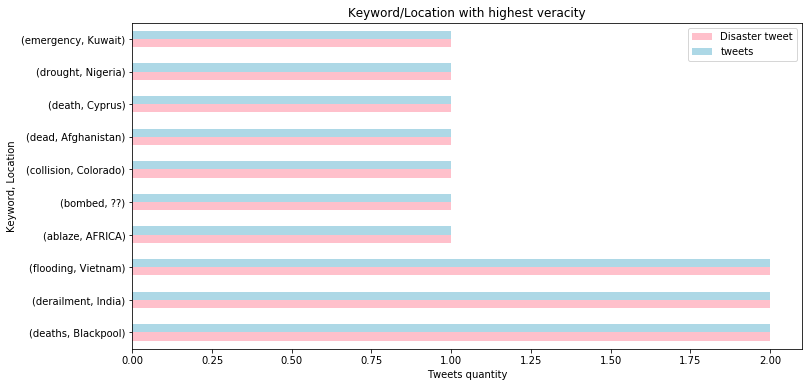

In [45]:
tweets_grouped_k_l.nlargest(10,'target_sum').plot(kind='barh',title='Keyword/Location with highest veracity',linewidth=2,figsize=(12,6), color=['pink','lightblue']);
ax=plt.gca()
ax.set_ylabel('Keyword, Location');
ax.set_xlabel('Tweets quantity')
ax.legend(("Disaster tweet","tweets"))
plt.savefig('barKeywordLocationHigh.png')

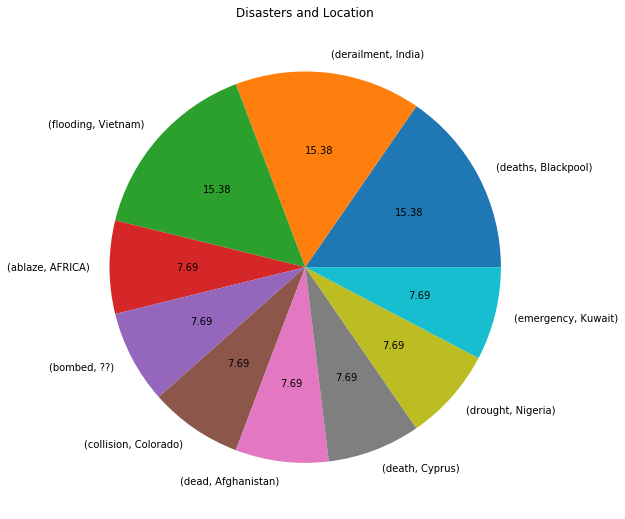

In [46]:
plot = tweets_grouped_k_l.nlargest(10,'target_sum').plot.pie(y='target_sum',legend=None, figsize=(9, 9),autopct='%.2f')
plot.set_title("Disasters and Location")
plot.set_ylabel("")
plt.savefig('pieKeywordLocationHigh.png')

#### Se puede ver que la localidad de los accidentes se relaciona con el sitio en donde se provocan. Por ejemplo los incendios en Africa que es un continente de clima arido, los descarrilamientos en India en donde existen extensas lineas de ferrocaril que llevan a millones de pasajeros por dia. Las inundaciones en Vietnam dado la grandes lluvias que ese país tiene cada año.

### Ahora vemos los pares con menor cantidad de tweets verdaderos.

In [47]:
tweets_grouped_k_l.nsmallest(10,'target_sum')

,,target_sum,target_count
keyword,location,,
battle,Utah,0,1
deluge,Australia,0,1
flooding,?,0,1
seismic,Somalia,0,1
traumatised,Ireland,0,1
upheaval,Chester,0,1
ablaze,AFRICA,1,1
bombed,??,1,1
collision,Colorado,1,1


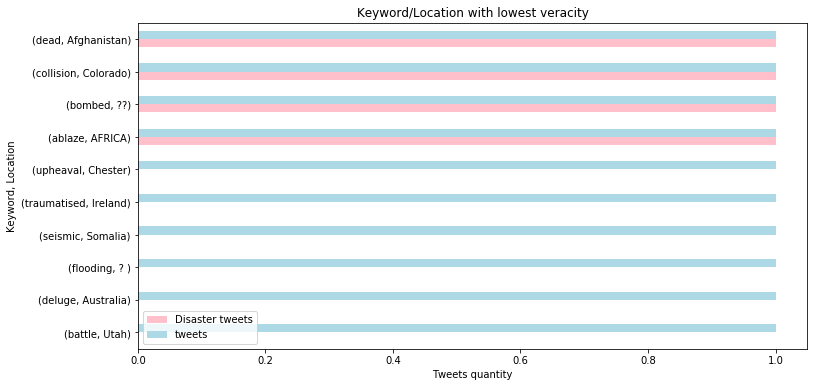

In [48]:
#Tomamos los 5 pares de menor veracidad
tweets_grouped_k_l.nsmallest(10,'target_sum').plot(kind='barh',title='Keyword/Location with lowest veracity',linewidth=2,figsize=(12,6), color=['pink','lightblue']);
ax=plt.gca()
ax.set_ylabel('Keyword, Location');
ax.set_xlabel('Tweets quantity')
ax.legend(("Disaster tweets","tweets"))
plt.savefig('barKeywordLocationLow.png')

#### De esta figura notamos cuales pares clave/localidad no se relacionan en absoluto con tweets sobre catasfrofes como se pueden notar en los ultimos 6 pares. Se nota que los tipos de accidentes mencionados son en relacion al ambito urbano, como por ejemplo (battle, Utah), (traumatised, Ireland) y (upheaval, Chester) no mencionan tipos de desastres naturales y la interpretacion es muy genérica por lo que facilmente puede no trataste de un tweets sobre una catastrofe.

#### Nuevamente se nota la aparicion de el par (ablaze,Africa), (dead, Afghanistan), esto se debe a la poca cantidad de coincidencias entre claves y localidades, los valores se encuentran entre 0 y 2.